In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import pathlib

In [2]:
save_plots = False

In [3]:
## Create plots directory, if missing
plotsDirectory = (str(pathlib.Path.home())
                  + '/vertex-reconstruction-studies/'
                  + 'plots/'
                  + 'studies_on_davinci_parsed_logs/'
                  + 'iteration_properties_study/'
)
pathlib.Path(plotsDirectory).mkdir(parents=True, exist_ok=True)

In [4]:
convergedColor = 'tab:blue'
failedColor = 'tab:orange'

# Import MC data

In [5]:
inputFile = '~/data/parsedDaVinciLog.h5'
df_events = pd.read_hdf(inputFile, key='LHCbMC_Lb')

# Helper functions

In [6]:
## Rows and columns begin at 0
def Feature2DComponent(series, row, column):
    return series.map(lambda x: x[row][column])

def Feature1DComponent(series, component):
    return series.map(lambda x: x[component])

In [7]:
def PlotOverlappingHistograms(
    series,
    axisLabel,
    plotTitle,
    fileName,
    binning,
    boundaries,
    scale='linear',
    scientificNotationLabel=False,
    normalized=True
):
    ## Converged
    plt.hist(series.loc[df_events['status'] == 'Converged'],
             bins=binning,
             range=boundaries,
             label="Converged",
             histtype='stepfilled',
             edgecolor=convergedColor,
             color=mcolors.to_rgba(convergedColor, alpha=0.05),
             density=normalized
    )
    
    ## Failed
    plt.hist(series.loc[df_events['status'] == 'NonConverged'],
             bins=binning,
             range=boundaries,
             label="Failed",
             histtype='stepfilled',
             edgecolor=failedColor,
             color=mcolors.to_rgba(failedColor, alpha=0.05),
             density=normalized
    )
    
   
    plt.grid()
    plt.xlabel(axisLabel)
    plt.title(plotTitle)
    plt.yscale(scale)
    
    if normalized:
        plt.ylabel("Probability density")
    else:
        plt.ylabel("Events")
    
    plt.legend()
    
    if scientificNotationLabel:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
    if save_plots:
        plt.savefig(plotsDirectory + fileName + '.pdf', bbox_inches='tight')
    
    plt.show()

In [8]:
particleInfo = {
    'proton': {
        'nameLowercase': 'proton',
        'nameUppercase': 'Proton',
        'symbol': '$p$',
        'iter_refPoint': 'iter_p_refPoint',
        'iter_momentum': 'iter_p_momentum'
    },
    
    'pion': {
        'nameLowercase': 'pion',
        'nameUppercase': 'Pion',
        'symbol': '$\pi$',
        'iter_refPoint': 'iter_pim_refPoint',
        'iter_momentum': 'iter_pim_momentum'
    },
    
}

# Reference points

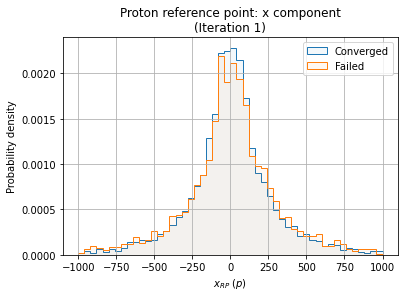

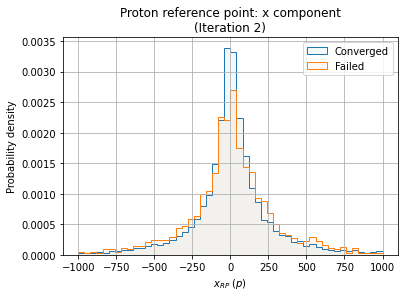

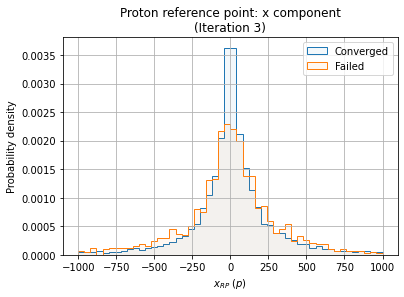

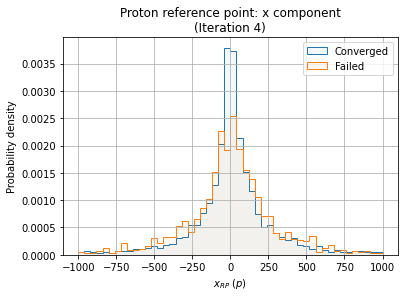

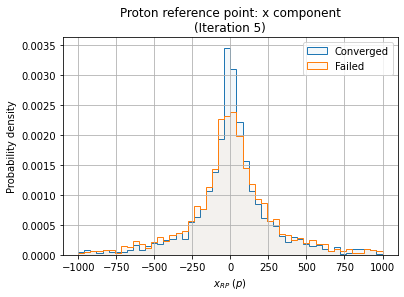

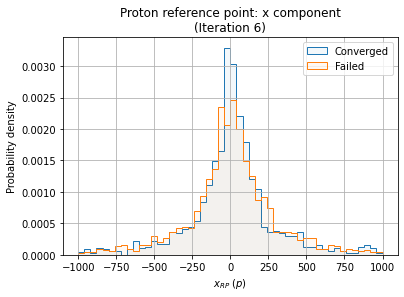

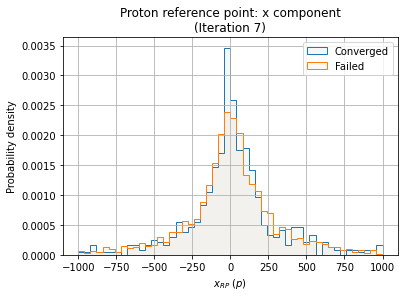

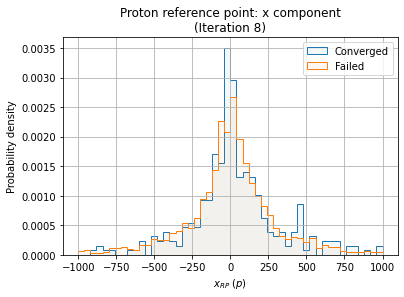

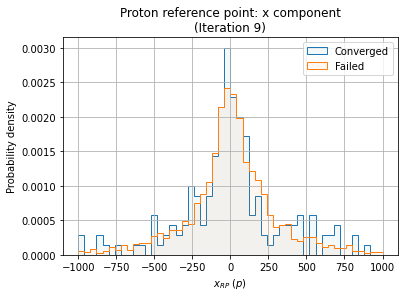

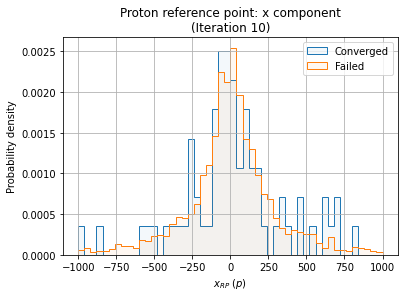

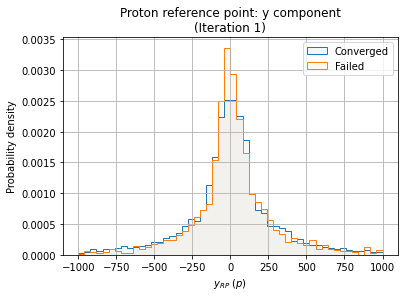

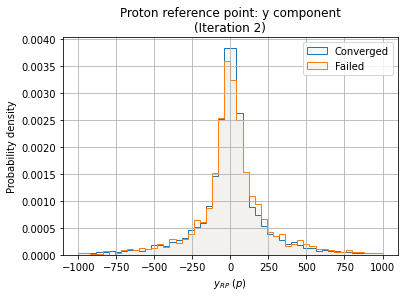

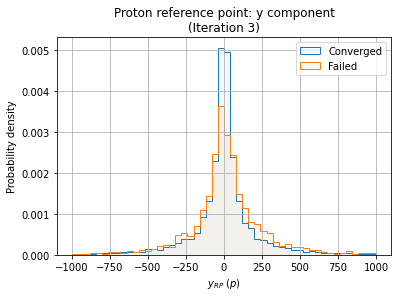

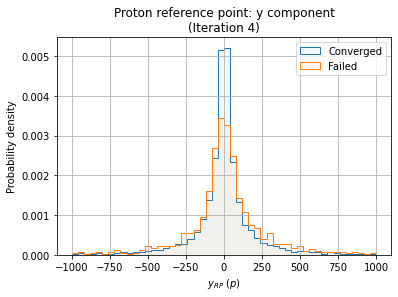

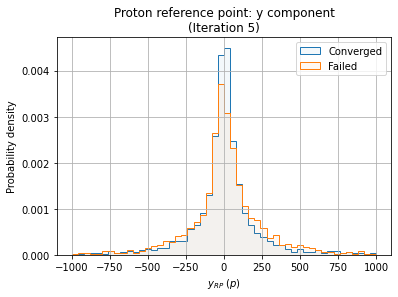

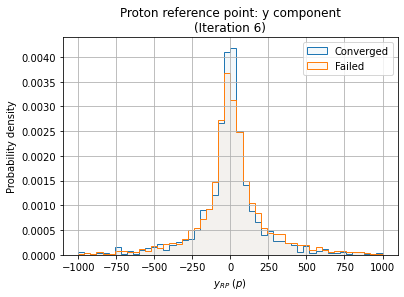

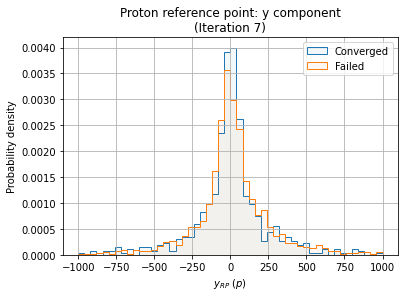

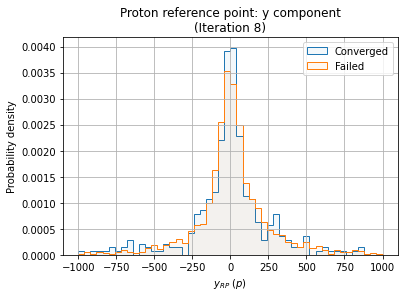

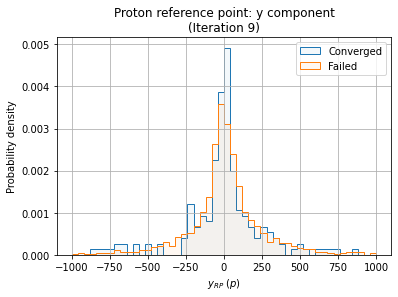

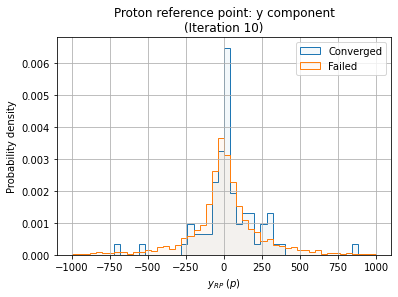

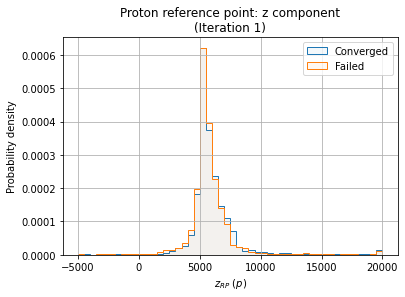

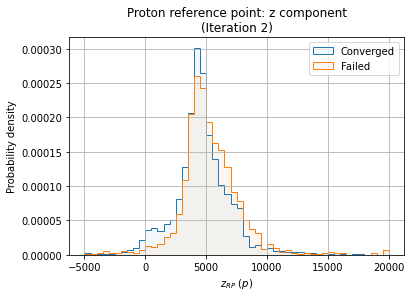

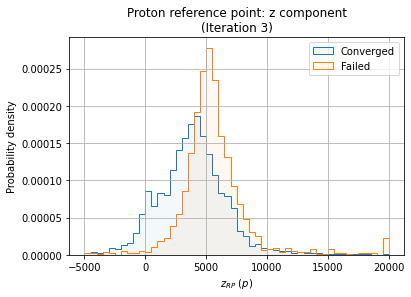

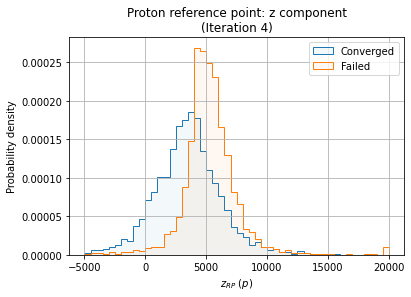

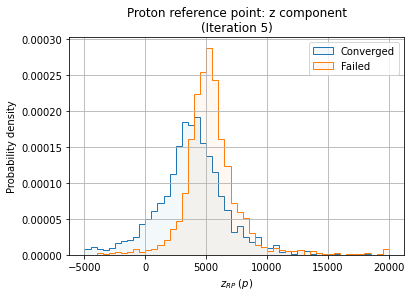

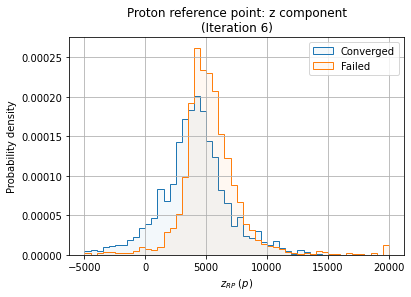

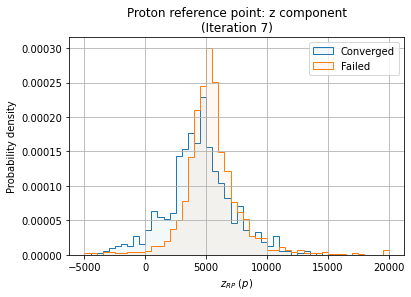

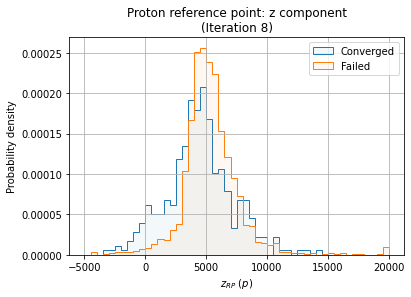

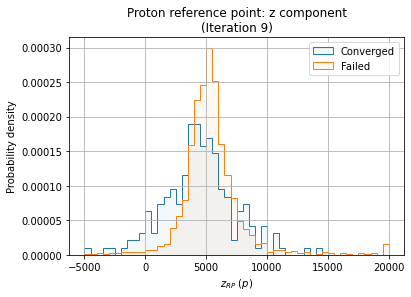

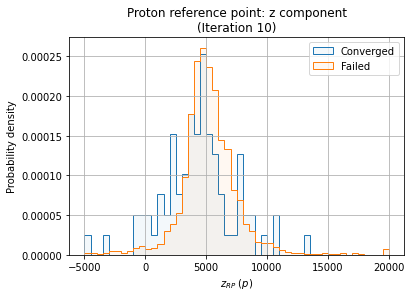

In [9]:
particle = 'proton'
refPointInfo = {
    0: {
        'component': 'x',
        'boundaries': [-1000,1000]
    },
    
    1: {
        'component': 'y',
        'boundaries': [-1000,1000]
    },
    
    2: {
        'component': 'z',
        'boundaries': [-5000,20000]
    },
}

for refPointComponent in range(3):
    for iteration in range(1,11):
        title = (
            particleInfo[particle]['nameUppercase']
            + " reference point: "
            + refPointInfo[refPointComponent]['component']
            + " component" + "\n"
            + "(Iteration " + str(iteration) + ")"
        )

        plotArgs = {
            "axisLabel": "$" + refPointInfo[refPointComponent]['component'] + "_{RP}$ (" + particleInfo[particle]['symbol'] + ")",
            "plotTitle": title,
            "fileName": particleInfo[particle]['nameLowercase'] + "_refPoint_" + refPointInfo[refPointComponent]['component'],
            "scale": "linear",
            "binning": 50,
            "boundaries": refPointInfo[refPointComponent]['boundaries'],
            "scientificNotationLabel": False,
            "normalized": True
        }

        PlotOverlappingHistograms(
            Feature1DComponent(
                Feature1DComponent(
                    df_events.loc[df_events['numberOfIterations'] >= iteration, particleInfo[particle]['iter_refPoint']],
                iteration-1),
            refPointComponent),
        **plotArgs)

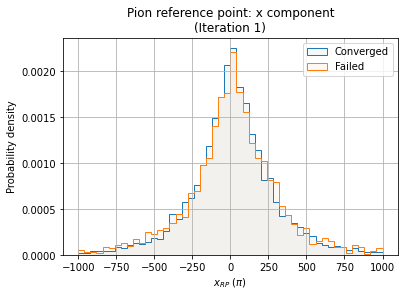

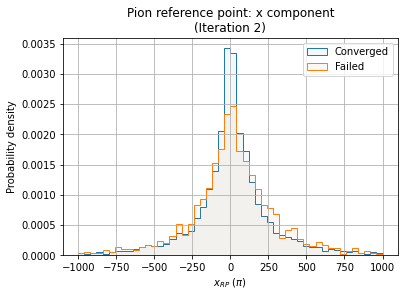

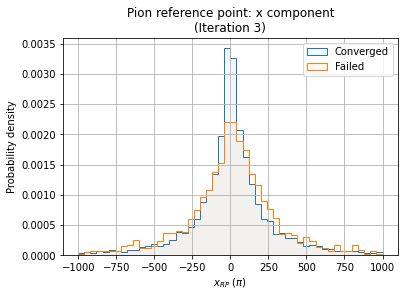

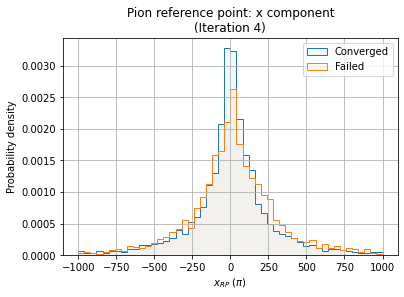

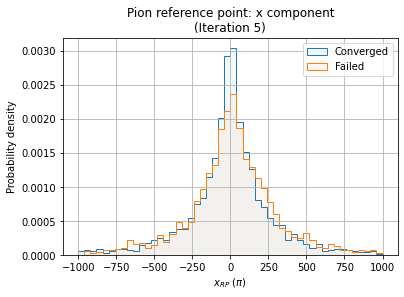

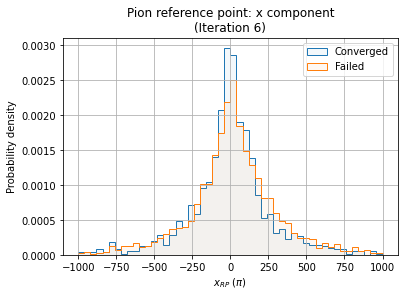

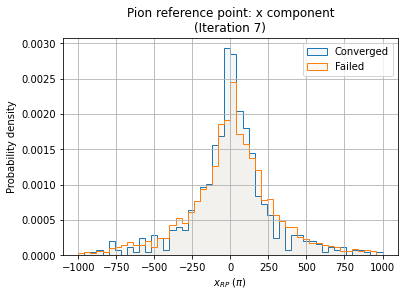

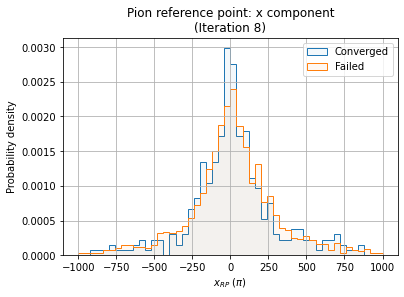

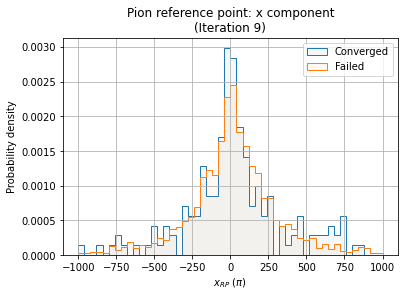

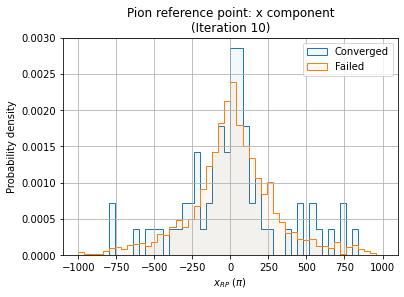

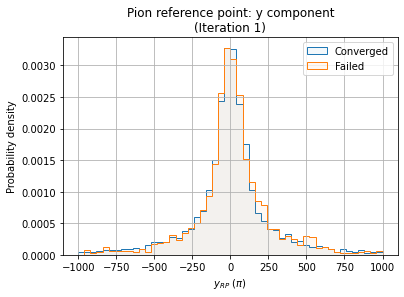

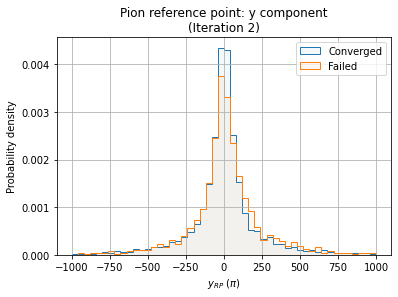

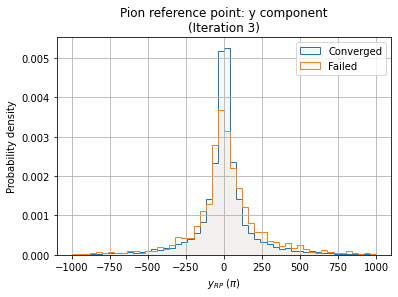

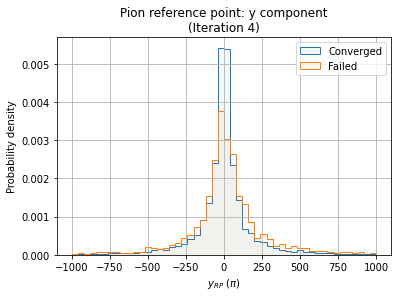

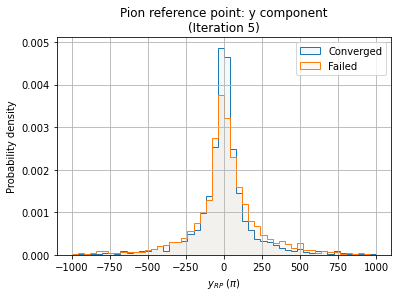

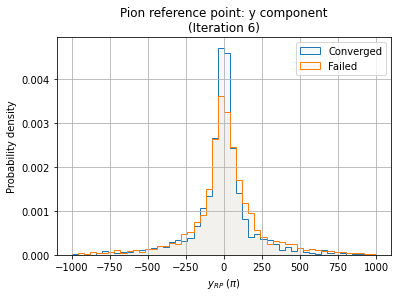

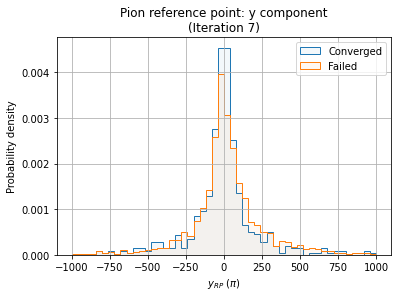

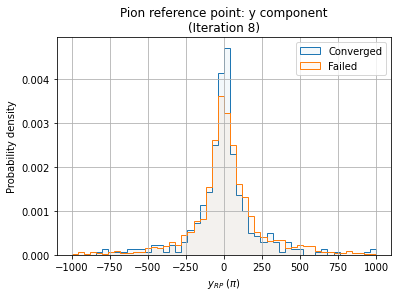

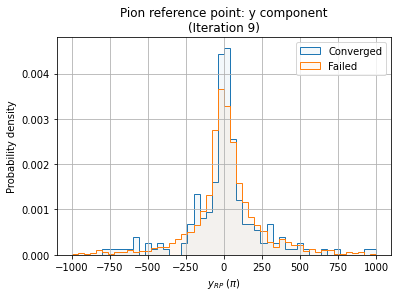

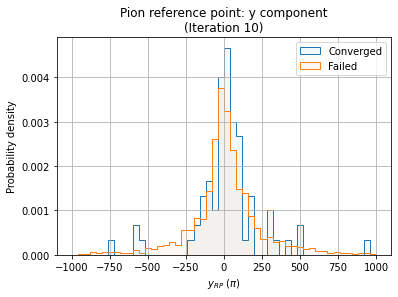

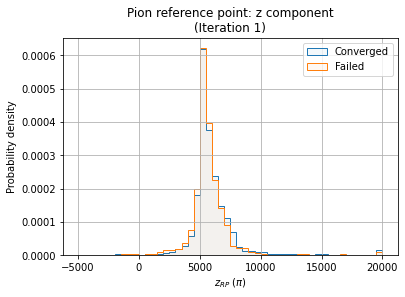

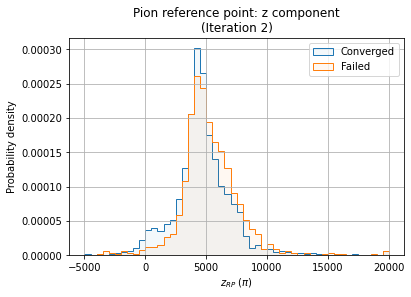

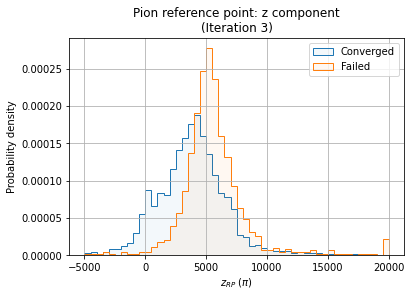

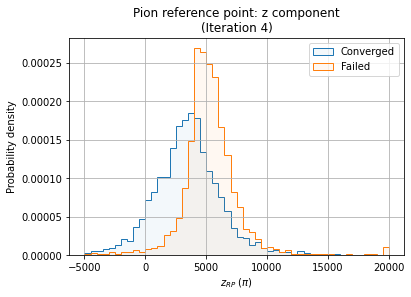

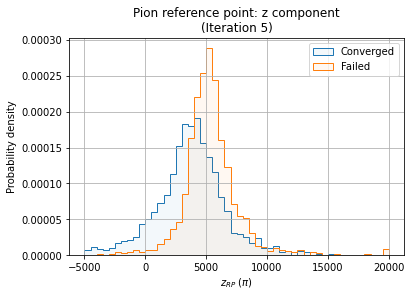

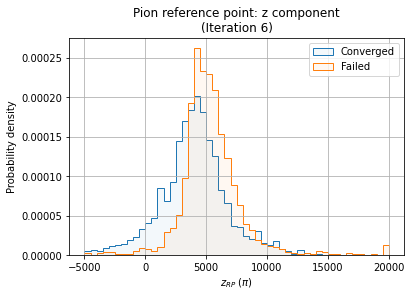

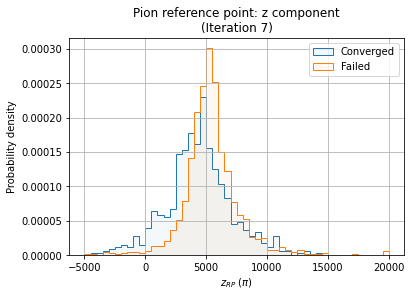

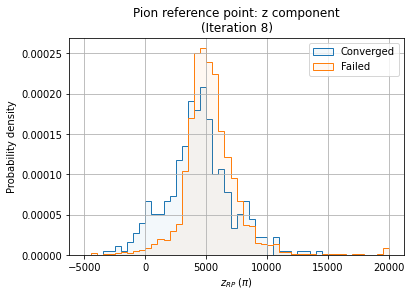

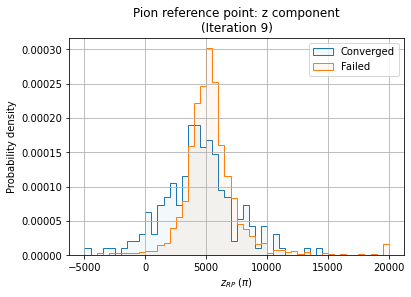

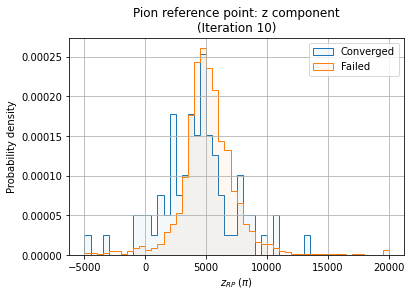

In [10]:
particle = 'pion'
refPointInfo = {
    0: {
        'component': 'x',
        'boundaries': [-1000,1000]
    },
    
    1: {
        'component': 'y',
        'boundaries': [-1000,1000]
    },
    
    2: {
        'component': 'z',
        'boundaries': [-5000,20000]
    },
}

for refPointComponent in range(3):
    for iteration in range(1,11):
        title = (
            particleInfo[particle]['nameUppercase']
            + " reference point: "
            + refPointInfo[refPointComponent]['component']
            + " component" + "\n"
            + "(Iteration " + str(iteration) + ")"
        )

        plotArgs = {
            "axisLabel": "$" + refPointInfo[refPointComponent]['component'] + "_{RP}$ (" + particleInfo[particle]['symbol'] + ")",
            "plotTitle": title,
            "fileName": particleInfo[particle]['nameLowercase'] + "_refPoint_" + refPointInfo[refPointComponent]['component'],
            "scale": "linear",
            "binning": 50,
            "boundaries": refPointInfo[refPointComponent]['boundaries'],
            "scientificNotationLabel": False,
            "normalized": True
        }

        PlotOverlappingHistograms(
            Feature1DComponent(
                Feature1DComponent(
                    df_events.loc[df_events['numberOfIterations'] >= iteration, particleInfo[particle]['iter_refPoint']],
                iteration-1),
            refPointComponent),
        **plotArgs)

# Momenta

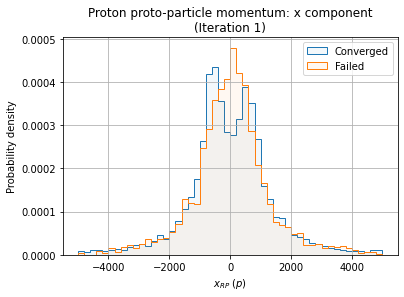

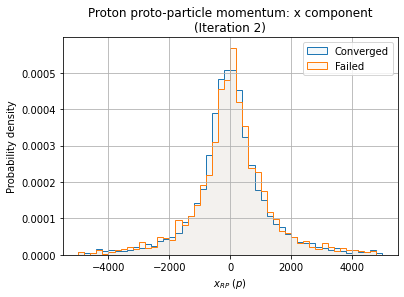

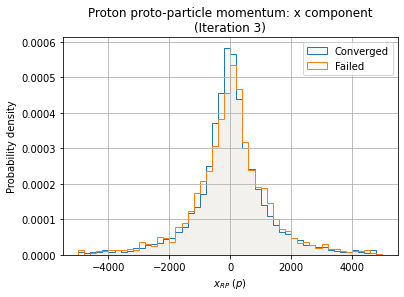

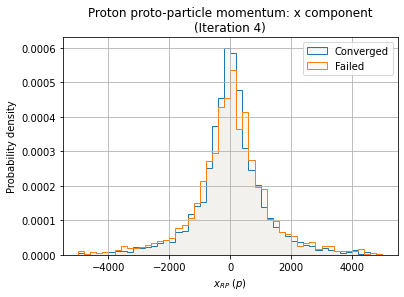

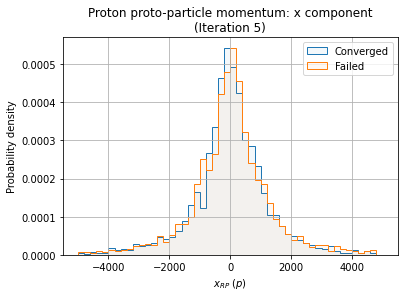

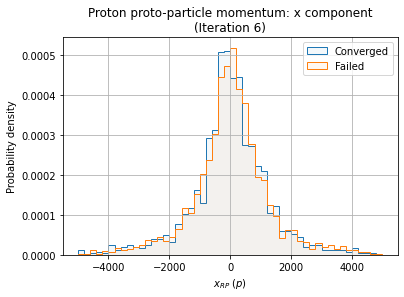

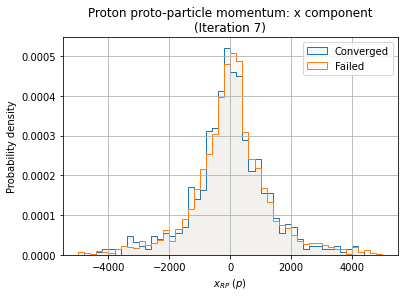

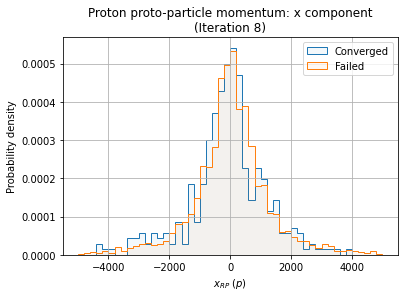

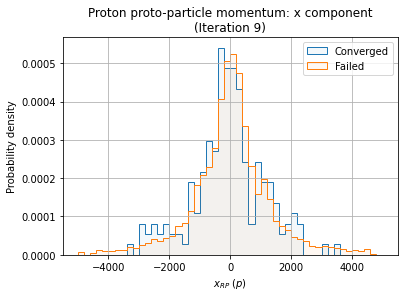

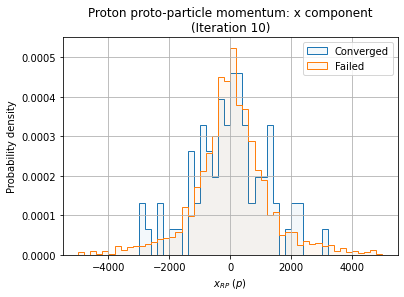

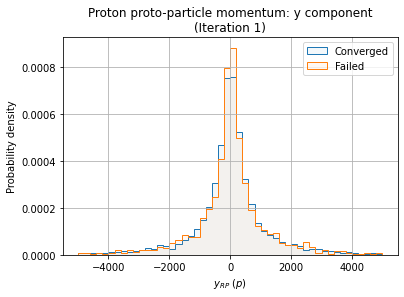

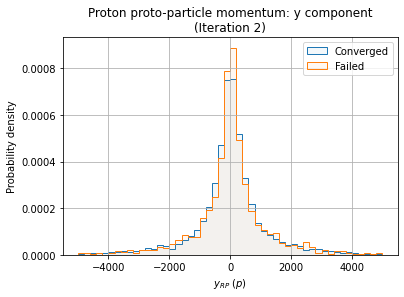

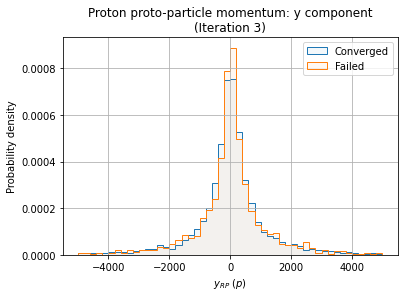

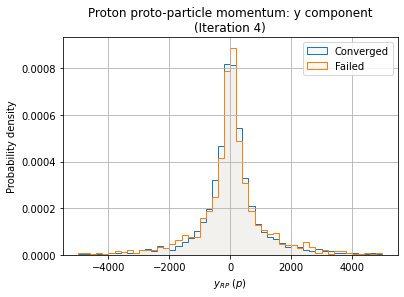

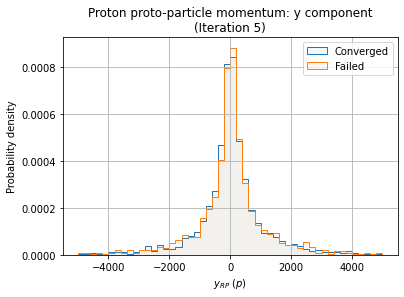

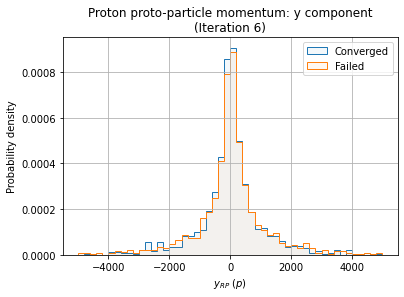

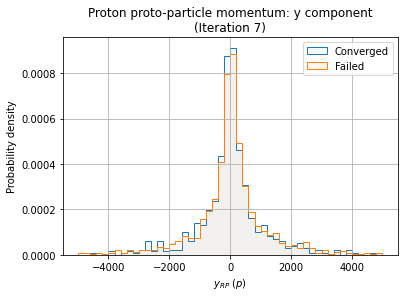

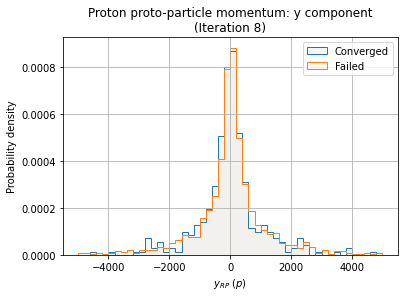

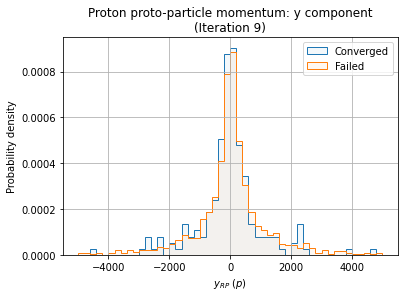

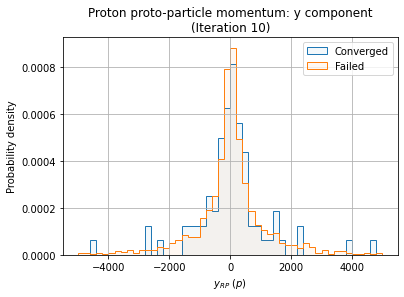

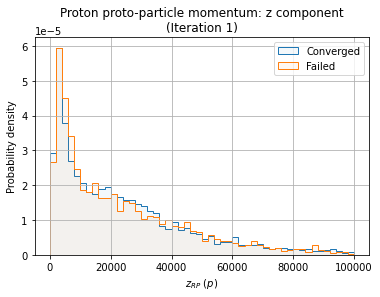

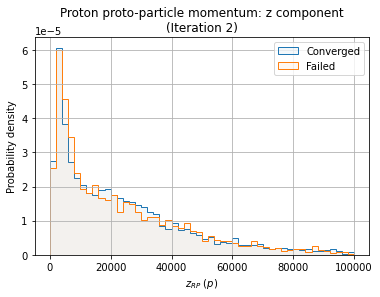

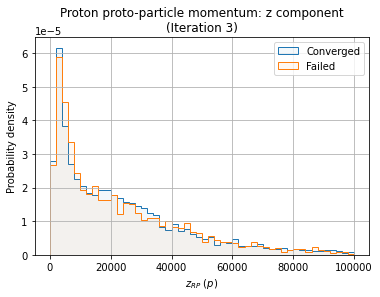

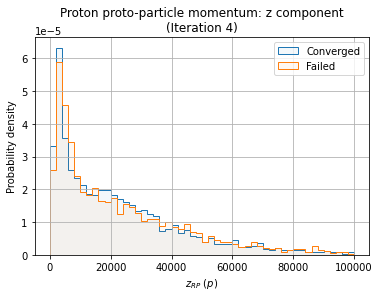

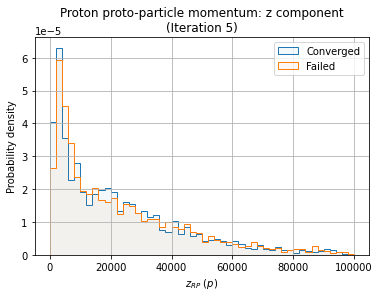

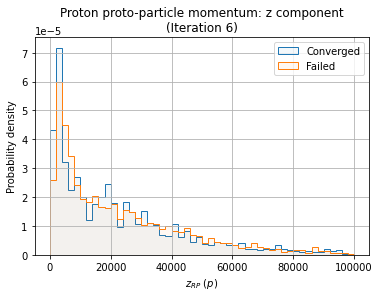

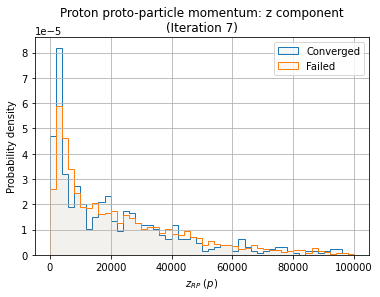

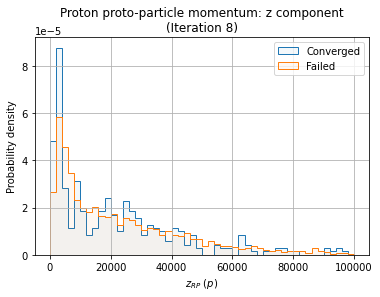

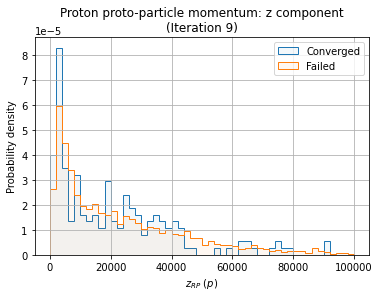

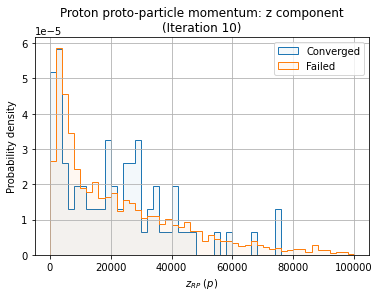

In [11]:
particle = 'proton'
momentumInfo = {
    0: {
        'component': 'x',
        'boundaries': [-5000,5000]
    },
    
    1: {
        'component': 'y',
        'boundaries': [-5000,5000]
    },
    
    2: {
        'component': 'z',
        'boundaries': [0,100000]
    },
}

for momentumComponent in range(3):
    for iteration in range(1,11):
        title = (
            particleInfo[particle]['nameUppercase']
            + " proto-particle momentum: "
            + momentumInfo[momentumComponent]['component']
            + " component" + "\n"
            + "(Iteration " + str(iteration) + ")"
        )

        plotArgs = {
            "axisLabel": "$" + momentumInfo[momentumComponent]['component'] + "_{RP}$ (" + particleInfo[particle]['symbol'] + ")",
            "plotTitle": title,
            "fileName": particleInfo[particle]['nameLowercase'] + "_PP_mom_" + momentumInfo[momentumComponent]['component'],
            "scale": "linear",
            "binning": 50,
            "boundaries": momentumInfo[momentumComponent]['boundaries'],
            "scientificNotationLabel": False,
            "normalized": True
        }

        PlotOverlappingHistograms(
            Feature1DComponent(
                Feature1DComponent(
                    df_events.loc[df_events['numberOfIterations'] >= iteration, particleInfo[particle]['iter_momentum']],
                iteration-1),
            momentumComponent),
        **plotArgs)

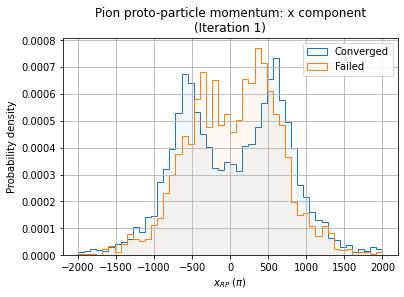

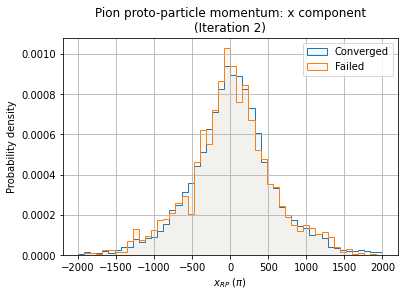

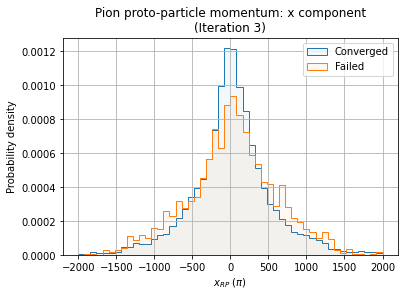

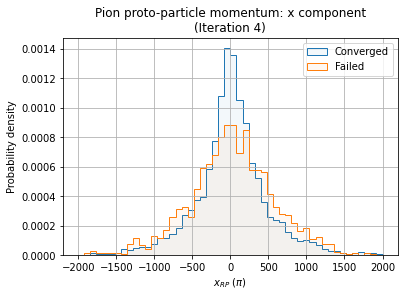

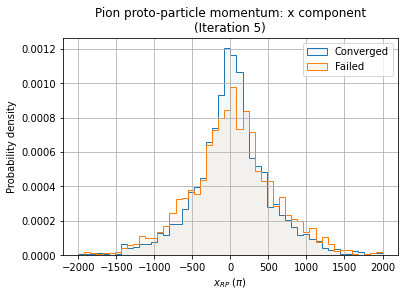

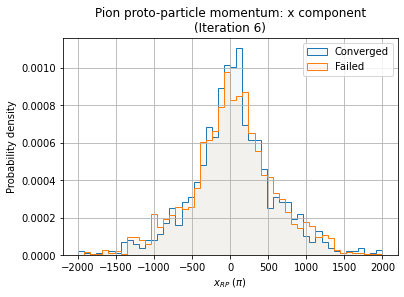

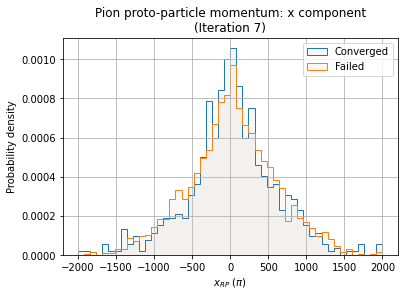

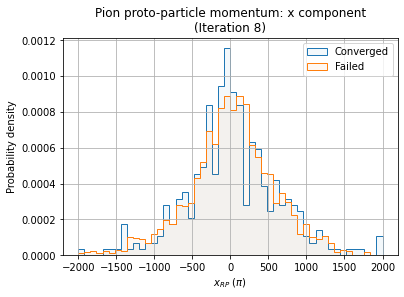

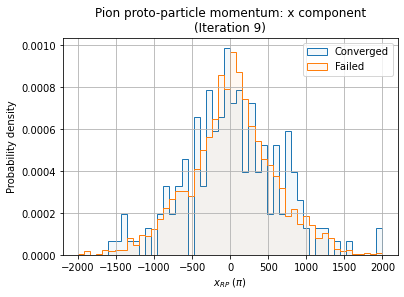

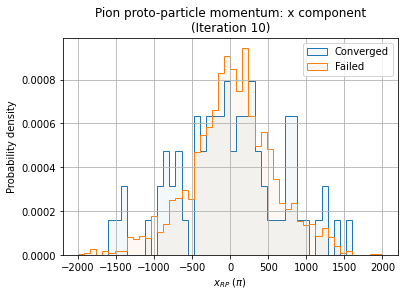

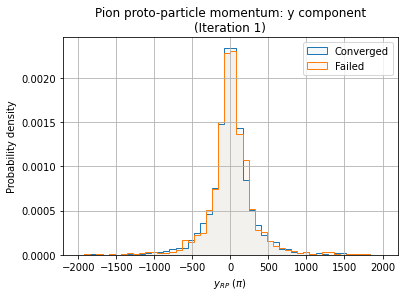

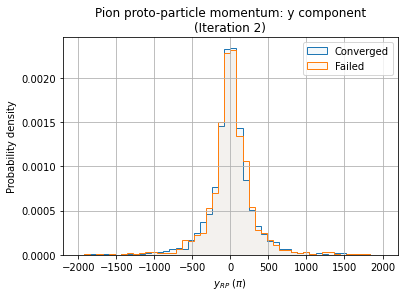

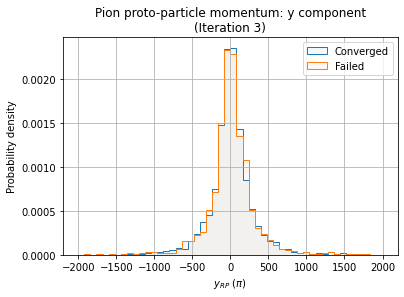

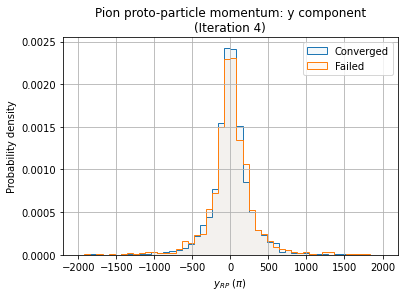

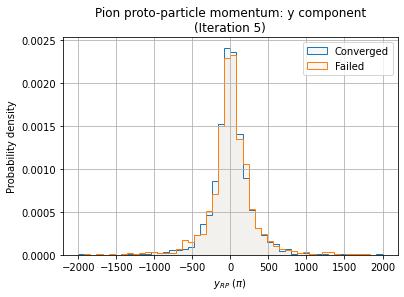

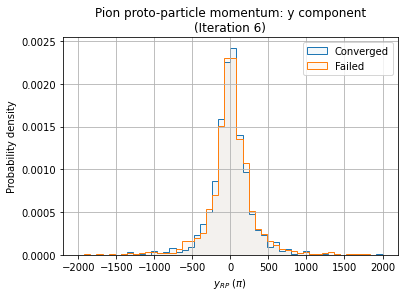

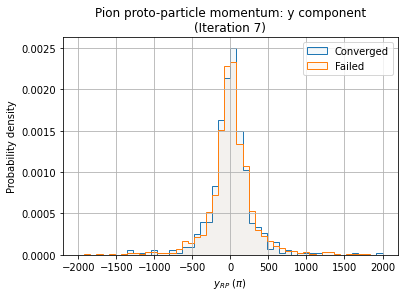

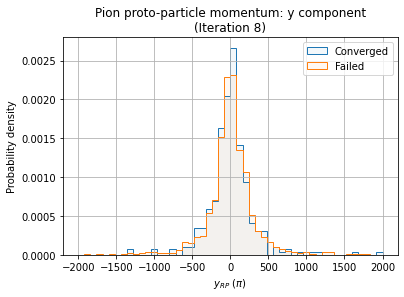

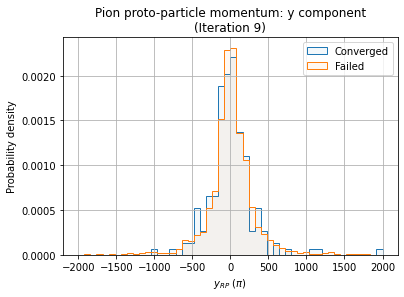

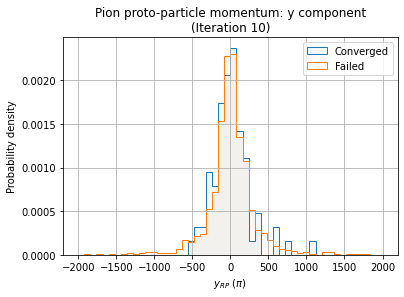

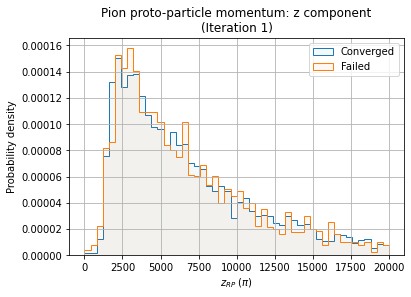

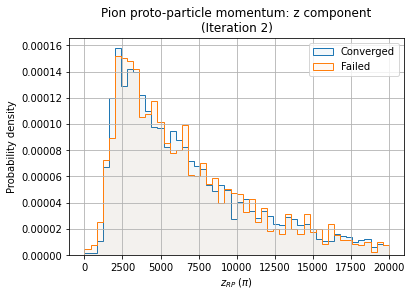

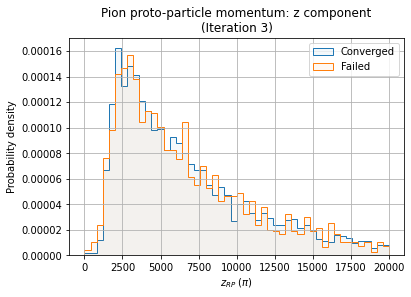

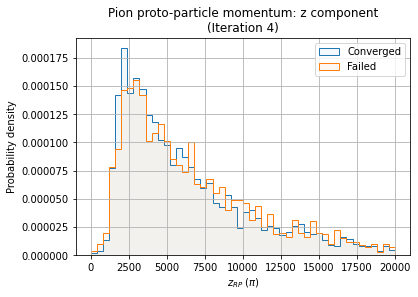

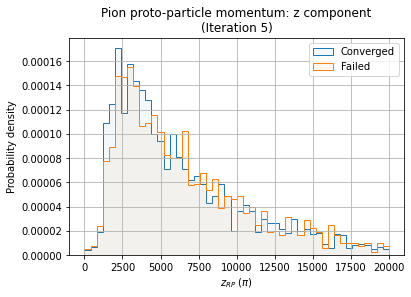

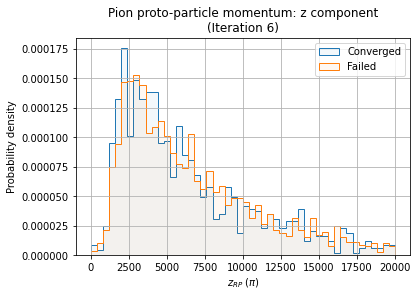

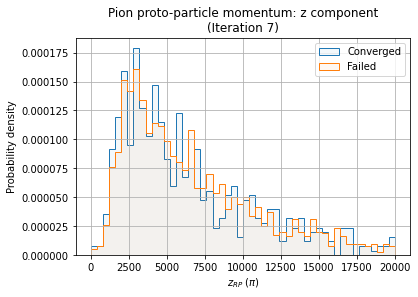

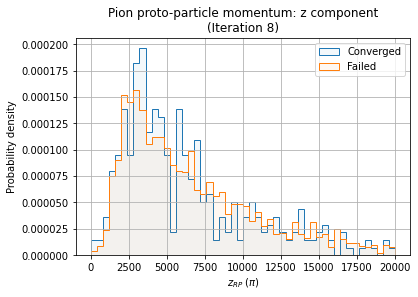

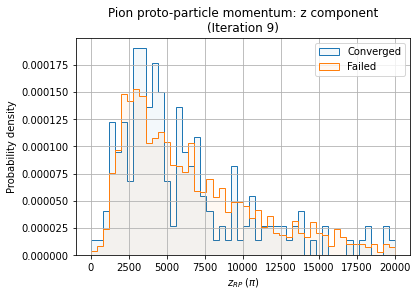

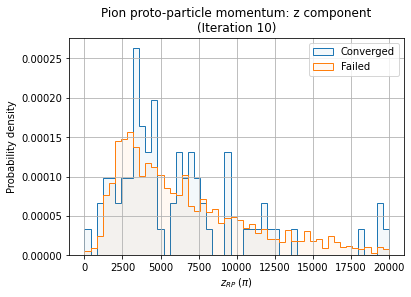

In [14]:
particle = 'pion'
momentumInfo = {
    0: {
        'component': 'x',
        'boundaries': [-2000,2000]
    },
    
    1: {
        'component': 'y',
        'boundaries': [-2000,2000]
    },
    
    2: {
        'component': 'z',
        'boundaries': [0,20000]
    },
}

for momentumComponent in range(3):
    for iteration in range(1,11):
        title = (
            particleInfo[particle]['nameUppercase']
            + " proto-particle momentum: "
            + momentumInfo[momentumComponent]['component']
            + " component" + "\n"
            + "(Iteration " + str(iteration) + ")"
        )

        plotArgs = {
            "axisLabel": "$" + momentumInfo[momentumComponent]['component'] + "_{RP}$ (" + particleInfo[particle]['symbol'] + ")",
            "plotTitle": title,
            "fileName": particleInfo[particle]['nameLowercase'] + "_PP_mom_" + momentumInfo[momentumComponent]['component'],
            "scale": "linear",
            "binning": 50,
            "boundaries": momentumInfo[momentumComponent]['boundaries'],
            "scientificNotationLabel": False,
            "normalized": True
        }

        PlotOverlappingHistograms(
            Feature1DComponent(
                Feature1DComponent(
                    df_events.loc[df_events['numberOfIterations'] >= iteration, particleInfo[particle]['iter_momentum']],
                iteration-1),
            momentumComponent),
        **plotArgs)